# برآورد همه‌گیری کووید-۱۹

## بارگذاری داده‌ها

ما از داده‌های مربوط به افراد مبتلا به کووید-۱۹ استفاده خواهیم کرد که توسط [مرکز علوم سیستم‌ها و مهندسی](https://systems.jhu.edu/) (CSSE) در [دانشگاه جانز هاپکینز](https://jhu.edu/) ارائه شده است. مجموعه داده‌ها در [این مخزن گیت‌هاب](https://github.com/CSSEGISandData/COVID-19) در دسترس است.


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

ما می‌توانیم جدیدترین داده‌ها را مستقیماً از GitHub با استفاده از `pd.read_csv` بارگذاری کنیم. اگر به هر دلیلی داده‌ها در دسترس نباشند، همیشه می‌توانید از نسخه موجود به صورت محلی در پوشه `data` استفاده کنید - فقط خط زیر که `base_url` را تعریف می‌کند، از حالت کامنت خارج کنید:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

ما می‌توانیم ببینیم که هر ردیف جدول تعداد افراد آلوده را برای هر کشور و/یا استان تعریف می‌کند و ستون‌ها مربوط به تاریخ‌ها هستند. جداول مشابه می‌توانند برای داده‌های دیگر مانند تعداد بهبودیافتگان و تعداد مرگ‌ها بارگذاری شوند.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## درک داده‌ها

از جدول بالا، نقش ستون استان مشخص نیست. بیایید ببینیم مقادیر مختلفی که در ستون `Province/State` وجود دارند چیست:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

از نام‌ها می‌توان نتیجه گرفت که کشورهایی مانند استرالیا و چین تقسیم‌بندی جزئی‌تری بر اساس استان‌ها دارند. بیایید اطلاعاتی درباره چین پیدا کنیم تا مثال را ببینیم:


In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## پیش‌پردازش داده‌ها

ما علاقه‌ای به تقسیم کشورها به قلمروهای کوچک‌تر نداریم، بنابراین ابتدا این تقسیم‌بندی را حذف می‌کنیم و اطلاعات تمام قلمروها را با هم ترکیب می‌کنیم تا اطلاعات کل کشور را به دست آوریم. این کار را می‌توان با استفاده از `groupby` انجام داد:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

شما می‌توانید ببینید که به دلیل استفاده از `groupby` تمام DataFrame‌ها اکنون بر اساس کشور/منطقه ایندکس شده‌اند. بنابراین می‌توانیم با استفاده از `.loc` به داده‌های یک کشور خاص دسترسی پیدا کنیم:


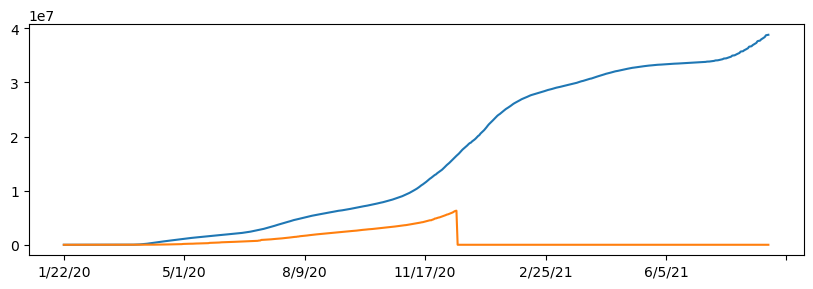

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **توجه** کنید که چگونه از `[2:]` استفاده می‌کنیم تا دو عنصر اول یک دنباله که شامل موقعیت جغرافیایی یک کشور هستند را حذف کنیم. همچنین می‌توانیم این دو ستون را به طور کامل حذف کنیم:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## بررسی داده‌ها

حالا بیایید به بررسی یک کشور خاص بپردازیم. بیایید یک فریم ایجاد کنیم که داده‌های مربوط به عفونت‌ها را بر اساس تاریخ فهرست‌بندی کند:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

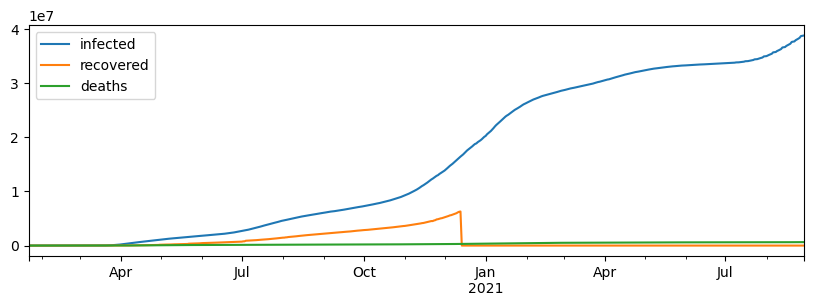

In [134]:
df.plot()
plt.show()

حالا بیایید تعداد افراد جدید مبتلا شده در هر روز را محاسبه کنیم. این به ما اجازه می‌دهد سرعت پیشرفت همه‌گیری را ببینیم. ساده‌ترین راه برای انجام این کار استفاده از `diff` است:


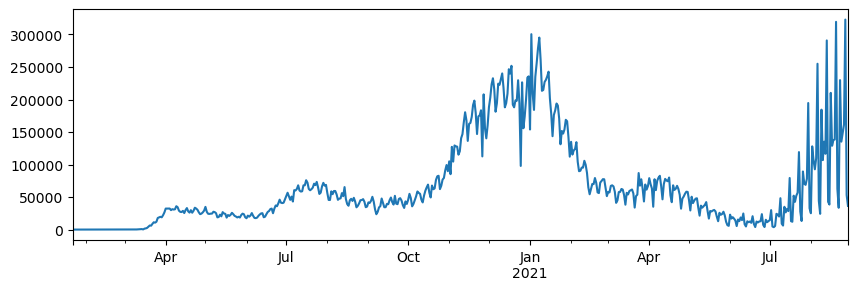

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

ما می‌توانیم نوسانات زیادی در داده‌ها ببینیم. بیایید به یکی از ماه‌ها دقیق‌تر نگاه کنیم:


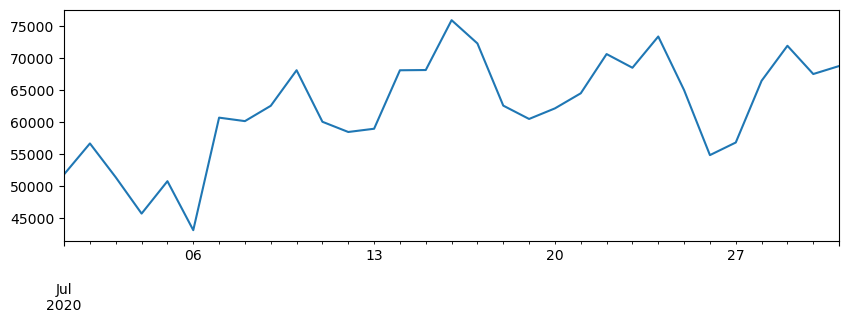

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

به وضوح به نظر می‌رسد که در داده‌ها نوسانات هفتگی وجود دارد. از آنجا که می‌خواهیم بتوانیم روندها را مشاهده کنیم، منطقی است که منحنی را با محاسبه میانگین متحرک هموار کنیم (یعنی برای هر روز میانگین مقدار چند روز گذشته را محاسبه خواهیم کرد):


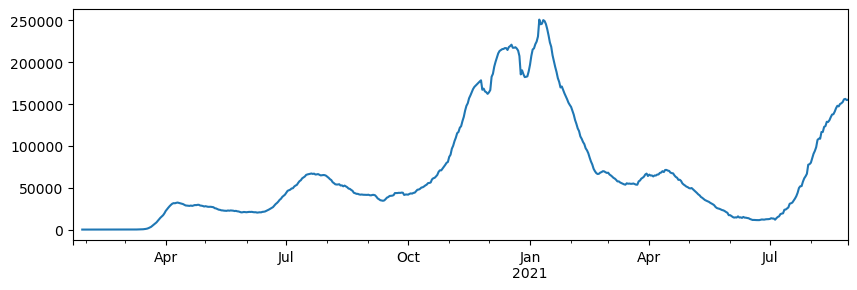

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

برای اینکه بتوانیم چندین کشور را مقایسه کنیم، ممکن است بخواهیم جمعیت کشور را در نظر بگیریم و درصد افراد آلوده را نسبت به جمعیت کشور مقایسه کنیم. برای به دست آوردن جمعیت کشور، بیایید مجموعه داده‌های کشورها را بارگذاری کنیم:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

چون این مجموعه داده شامل اطلاعاتی درباره کشورها و استان‌ها است، برای به دست آوردن جمعیت کل کشور باید کمی هوشمندانه عمل کنیم:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

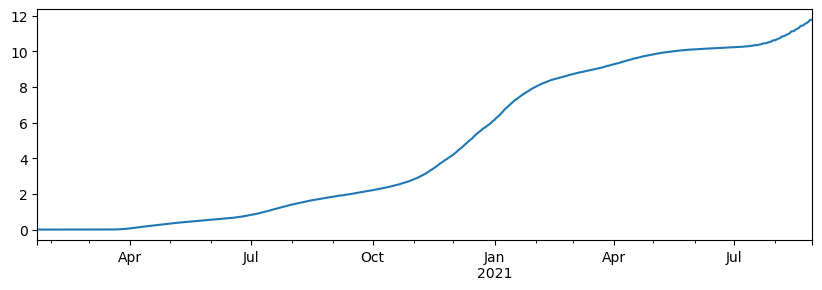

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## محاسبه $R_t$

برای بررسی میزان واگیردار بودن بیماری، به **عدد تولید مثل پایه** $R_0$ نگاه می‌کنیم، که نشان‌دهنده تعداد افرادی است که یک فرد آلوده می‌تواند به آن‌ها بیماری را منتقل کند. زمانی که $R_0$ بیشتر از ۱ باشد، احتمال گسترش اپیدمی وجود دارد.

$R_0$ ویژگی خود بیماری است و اقدامات محافظتی که افراد ممکن است برای کند کردن روند همه‌گیری انجام دهند را در نظر نمی‌گیرد. در طول پیشرفت همه‌گیری، می‌توانیم عدد تولید مثل $R_t$ را در هر زمان $t$ تخمین بزنیم. نشان داده شده است که این عدد را می‌توان به طور تقریبی با گرفتن یک بازه ۸ روزه محاسبه کرد و فرمول زیر را به کار برد:  
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$  
که در آن $I_t$ تعداد افراد جدید آلوده شده در روز $t$ است.

بیایید $R_t$ را برای داده‌های همه‌گیری خود محاسبه کنیم. برای این کار، یک بازه متحرک از ۸ مقدار `ninfected` را می‌گیریم و تابعی را برای محاسبه نسبت بالا اعمال می‌کنیم:


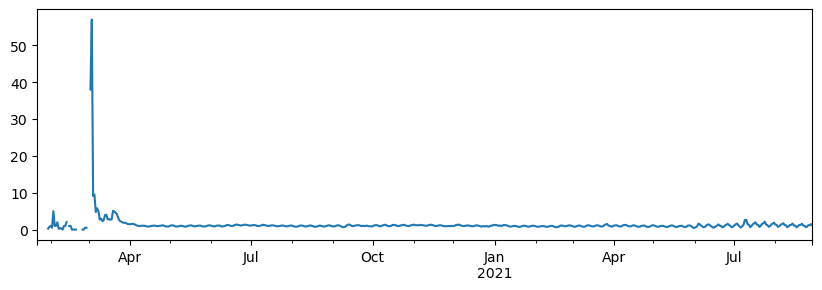

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

شما می‌توانید ببینید که در نمودار برخی جاها خالی هستند. این موارد ممکن است به دلیل وجود مقادیر `NaN` یا `inf` در مجموعه داده‌ها باشد. مقدار `inf` ممکن است به دلیل تقسیم بر صفر ایجاد شود و `NaN` می‌تواند نشان‌دهنده داده‌های گم‌شده یا عدم وجود داده برای محاسبه نتیجه باشد (مانند ابتدای فریم ما، جایی که پنجره متحرک با عرض ۸ هنوز در دسترس نیست). برای زیباتر کردن نمودار، باید این مقادیر را با استفاده از توابع `replace` و `fillna` پر کنیم.

حالا بیایید به ابتدای همه‌گیری نگاهی بیندازیم. همچنین مقادیر محور y را محدود می‌کنیم تا فقط مقادیر کمتر از ۶ نمایش داده شوند، تا دید بهتری داشته باشیم، و یک خط افقی در مقدار ۱ رسم می‌کنیم.


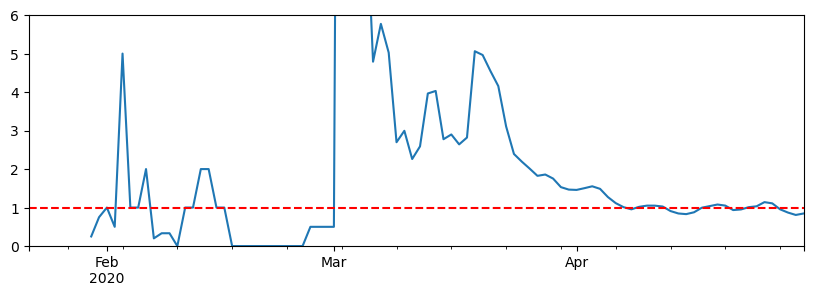

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

یکی دیگر از شاخص‌های جالب همه‌گیری **مشتق** یا **تفاوت روزانه** در موارد جدید است. این شاخص به ما امکان می‌دهد به وضوح ببینیم که همه‌گیری در حال افزایش یا کاهش است.


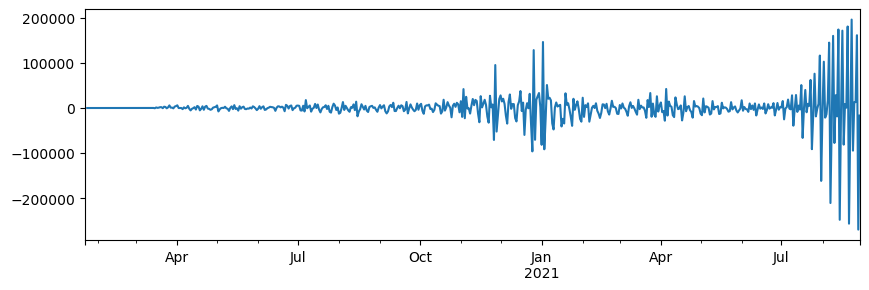

In [143]:
df['ninfected'].diff().plot()
plt.show()

با توجه به این واقعیت که نوسانات زیادی در داده‌ها به دلیل گزارش‌دهی وجود دارد، منطقی است که با اجرای میانگین متحرک، منحنی را هموار کنیم تا تصویر کلی به دست آید. بیایید دوباره بر ماه‌های اول همه‌گیری تمرکز کنیم:


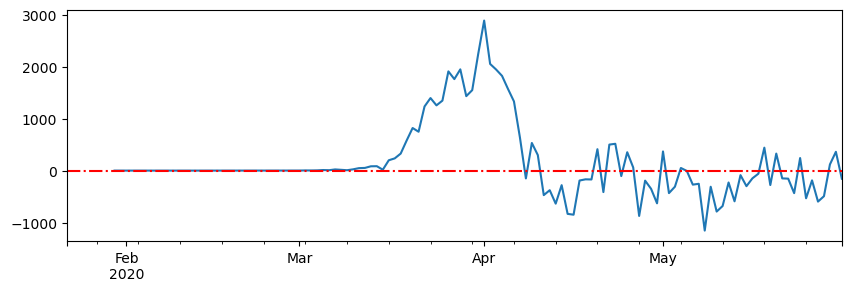

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## چالش

حالا وقت آن است که بیشتر با کد و داده‌ها کار کنید! در اینجا چند پیشنهاد برای آزمایش آورده شده است:
* گسترش همه‌گیری را در کشورهای مختلف بررسی کنید.
* نمودارهای $R_t$ را برای چند کشور در یک نمودار برای مقایسه رسم کنید، یا چند نمودار را کنار هم قرار دهید.
* ببینید چگونه تعداد مرگ‌ومیر و بهبودی‌ها با تعداد موارد مبتلا ارتباط دارد.
* سعی کنید بفهمید یک بیماری معمولی چقدر طول می‌کشد، با بررسی بصری نرخ ابتلا و نرخ مرگ‌ومیر و جستجوی برخی ناهنجاری‌ها. ممکن است نیاز باشد به کشورهای مختلف نگاه کنید تا این موضوع را پیدا کنید.
* نرخ مرگ‌ومیر را محاسبه کنید و ببینید چگونه در طول زمان تغییر می‌کند. ممکن است بخواهید طول بیماری را به روزها در نظر بگیرید تا یک سری زمانی را قبل از انجام محاسبات جابجا کنید.


## منابع

می‌توانید برای مطالعه بیشتر در مورد گسترش اپیدمی کووید به منابع زیر مراجعه کنید:
* [مدل SIR لغزنده برای تخمین Rt در طول همه‌گیری کووید](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/)، پست وبلاگ توسط [دمیتری سوشنیکوف](http://soshnikov.com)
* ت.پترووا، د.سوشنیکوف، آ.گرونین. [تخمین عدد تولید مثل وابسته به زمان برای شیوع جهانی کووید-19](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**، 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [کد مربوط به مقاله فوق در گیت‌هاب](https://github.com/shwars/SlidingSIR)



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
